In [2]:
import numpy as np
from matplotlib import pyplot as plt
from statsmodels import stats
from statsmodels.stats.multitest import fdrcorrection
import pandas as pd

In [5]:
df_corrected = pd.read_csv("corrected_p_val_rho_ECOGSTN.csv")

In [32]:
fdrcorrection(sprho_arr_pred_ECOG[:,0])[0]

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True])

In [6]:
sprho_arr_delta_STN = np.load('sprho_arr_delta_STN.npy')
sprho_arr_pred_STN = np.load('sprho_arr_pred_STN.npy')
sprho_arr_delta_ECOG = np.load('sprho_arr_delta_ECOG.npy')
sprho_arr_pred_ECOG = np.load('sprho_arr_pred_ECOG.npy')
epoch_lim = 30

In [52]:
df = pd.DataFrame({"time_point[s]" : x_,
            "rho_ECOG" : sprho_arr_pred_ECOG[:,0], 
             "p_ECOG" : sprho_arr_pred_ECOG[:,1], 
             "rho_STN" : sprho_arr_pred_STN[:,0],
             "p_STN" : sprho_arr_pred_STN[:,1], })

In [53]:
df.to_csv("p_val_rho_ECOGSTN.csv")

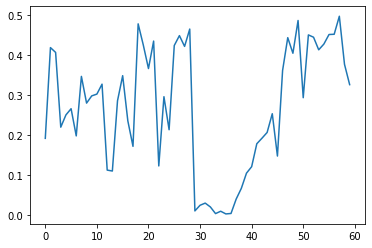

In [39]:
plt.plot(sprho_arr_pred_ECOG[:,1])

In [47]:
fdrcorrection(sprho_arr_pred_ECOG[:,1])

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False]),
 array([0.48396429, 0.48396429, 0.48396429, 0.48396429, 0.48396429,
        0.48396429, 0.48396429, 0.48396429, 0.48396429, 0.48396429,
        0.48396429, 0.48396429, 0.48396429, 0.48396429, 0.48396429,
        0.48396429, 0.48396429, 0.48396429, 0.49417241, 0.48396429,
        0.48396429, 0.48396429, 0.48396429, 0.48396429, 0.48396429,
        0.48396429, 0.48396429, 0.48396429, 0.48915789, 0.1272    ,
        0.21171429, 0.22575   , 0.205     , 0.084     , 0.1272    ,
        0.084     , 0.084     , 0.26733333, 0.

In [45]:
fdrcorrection?

### cluster corrected

In [9]:
df_corrected["p_ECOG_clustercorrected"] == 1

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
51     True
52     True
53     True
54     True
55     True
56     True
57     True
58     True
59     True
Name: p_ECOG_clustercorrected, dtype: bool

In [15]:
np.array(df_corrected["p_ECOG_clustercorrected"] == 1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

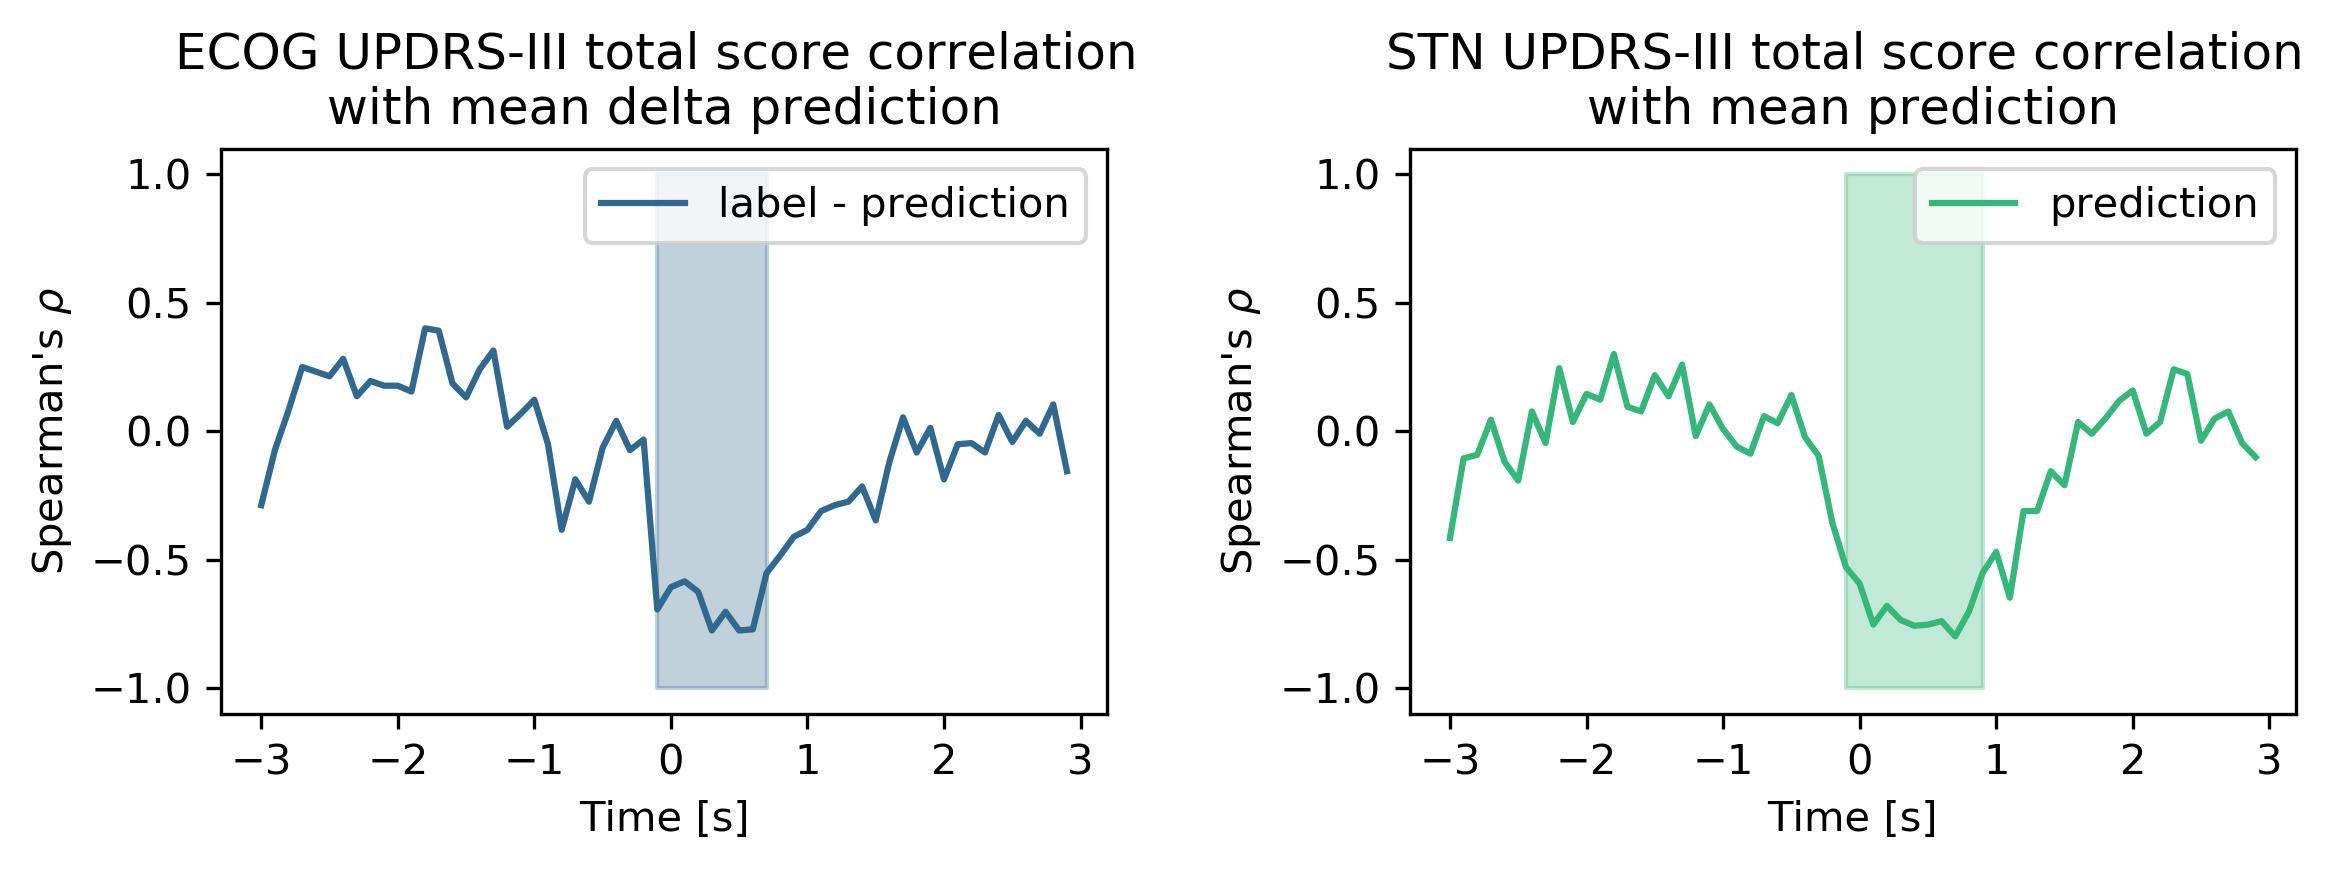

In [17]:
plt.figure(figsize=(8,3), dpi=300)
plt.subplot(121)
x_ = np.arange(-epoch_lim, epoch_lim, 1)*0.1
plt.plot(x_, sprho_arr_pred_ECOG[:,0], label="label - prediction", color=(49/255,104/255,142/255))
#plt.plot(x_, sprho_arr_pred, label = "prediction",color=(53/255,183/255,121/255))
plt.fill_between(x_, -1,1, where=np.array(df_corrected["p_ECOG_clustercorrected"] == 0), alpha=0.3, color=(49/255,104/255,142/255))
plt.ylabel("Spearman's "+r"$\rho$")
plt.xlabel("Time [s]")
plt.legend()
plt.title("ECOG UPDRS-III total score correlation \nwith mean delta prediction")

plt.subplot(122)
x_ = np.arange(-epoch_lim, epoch_lim, 1)*0.1
#plt.plot(x_, sprho_arr_delta, label="label - prediction", color=(49/255,104/255,142/255))
plt.plot(x_, sprho_arr_pred_STN[:,0], label = "prediction",color=(53/255,183/255,121/255))
plt.fill_between(x_, -1,1, where=np.array(df_corrected["p_STN_clustercorrected"] == 0), alpha=0.3, color=(53/255,183/255,121/255))
plt.ylabel("Spearman's "+r"$\rho$")
plt.xlabel("Time [s]")
plt.legend()
plt.title("STN UPDRS-III total score correlation \nwith mean prediction")
plt.tight_layout()

### FDR corrected

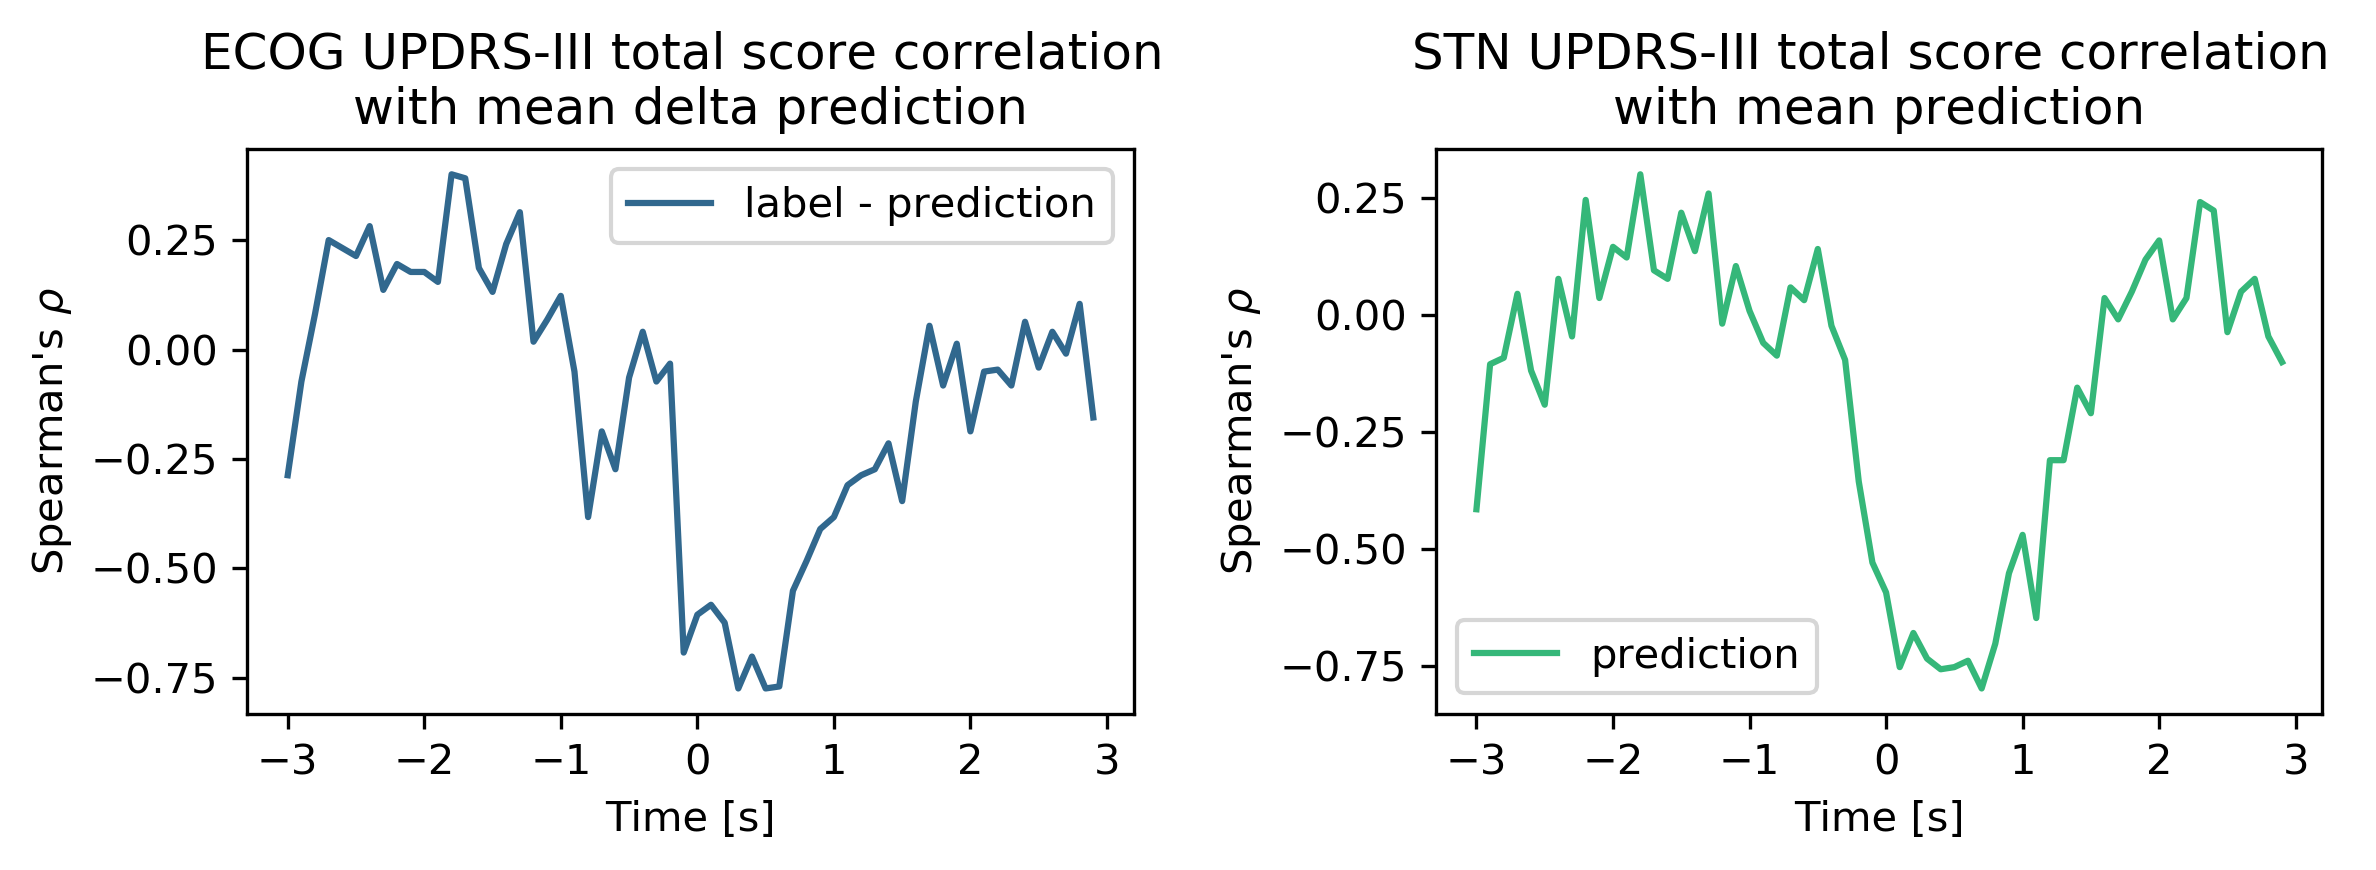

In [40]:
plt.figure(figsize=(8,3), dpi=300)
plt.subplot(121)
x_ = np.arange(-epoch_lim, epoch_lim, 1)*0.1
plt.plot(x_, sprho_arr_pred_ECOG[:,0], label="label - prediction", color=(49/255,104/255,142/255))
#plt.plot(x_, sprho_arr_pred, label = "prediction",color=(53/255,183/255,121/255))
plt.fill_between(x_, -1,1, where=fdrcorrection(sprho_arr_pred_ECOG[:,1])[0], alpha=0.3, color=(49/255,104/255,142/255))
plt.ylabel("Spearman's "+r"$\rho$")
plt.xlabel("Time [s]")
plt.legend()
plt.title("ECOG UPDRS-III total score correlation \nwith mean delta prediction")

plt.subplot(122)
x_ = np.arange(-epoch_lim, epoch_lim, 1)*0.1
#plt.plot(x_, sprho_arr_delta, label="label - prediction", color=(49/255,104/255,142/255))
plt.plot(x_, sprho_arr_pred_STN[:,0], label = "prediction",color=(53/255,183/255,121/255))
plt.fill_between(x_, -1,1, where=fdrcorrection(sprho_arr_pred_STN[:,1])[0], alpha=0.3, color=(53/255,183/255,121/255))
plt.ylabel("Spearman's "+r"$\rho$")
plt.xlabel("Time [s]")
plt.legend()
plt.title("STN UPDRS-III total score correlation \nwith mean prediction")
plt.tight_layout()

### Bonferroni corrected

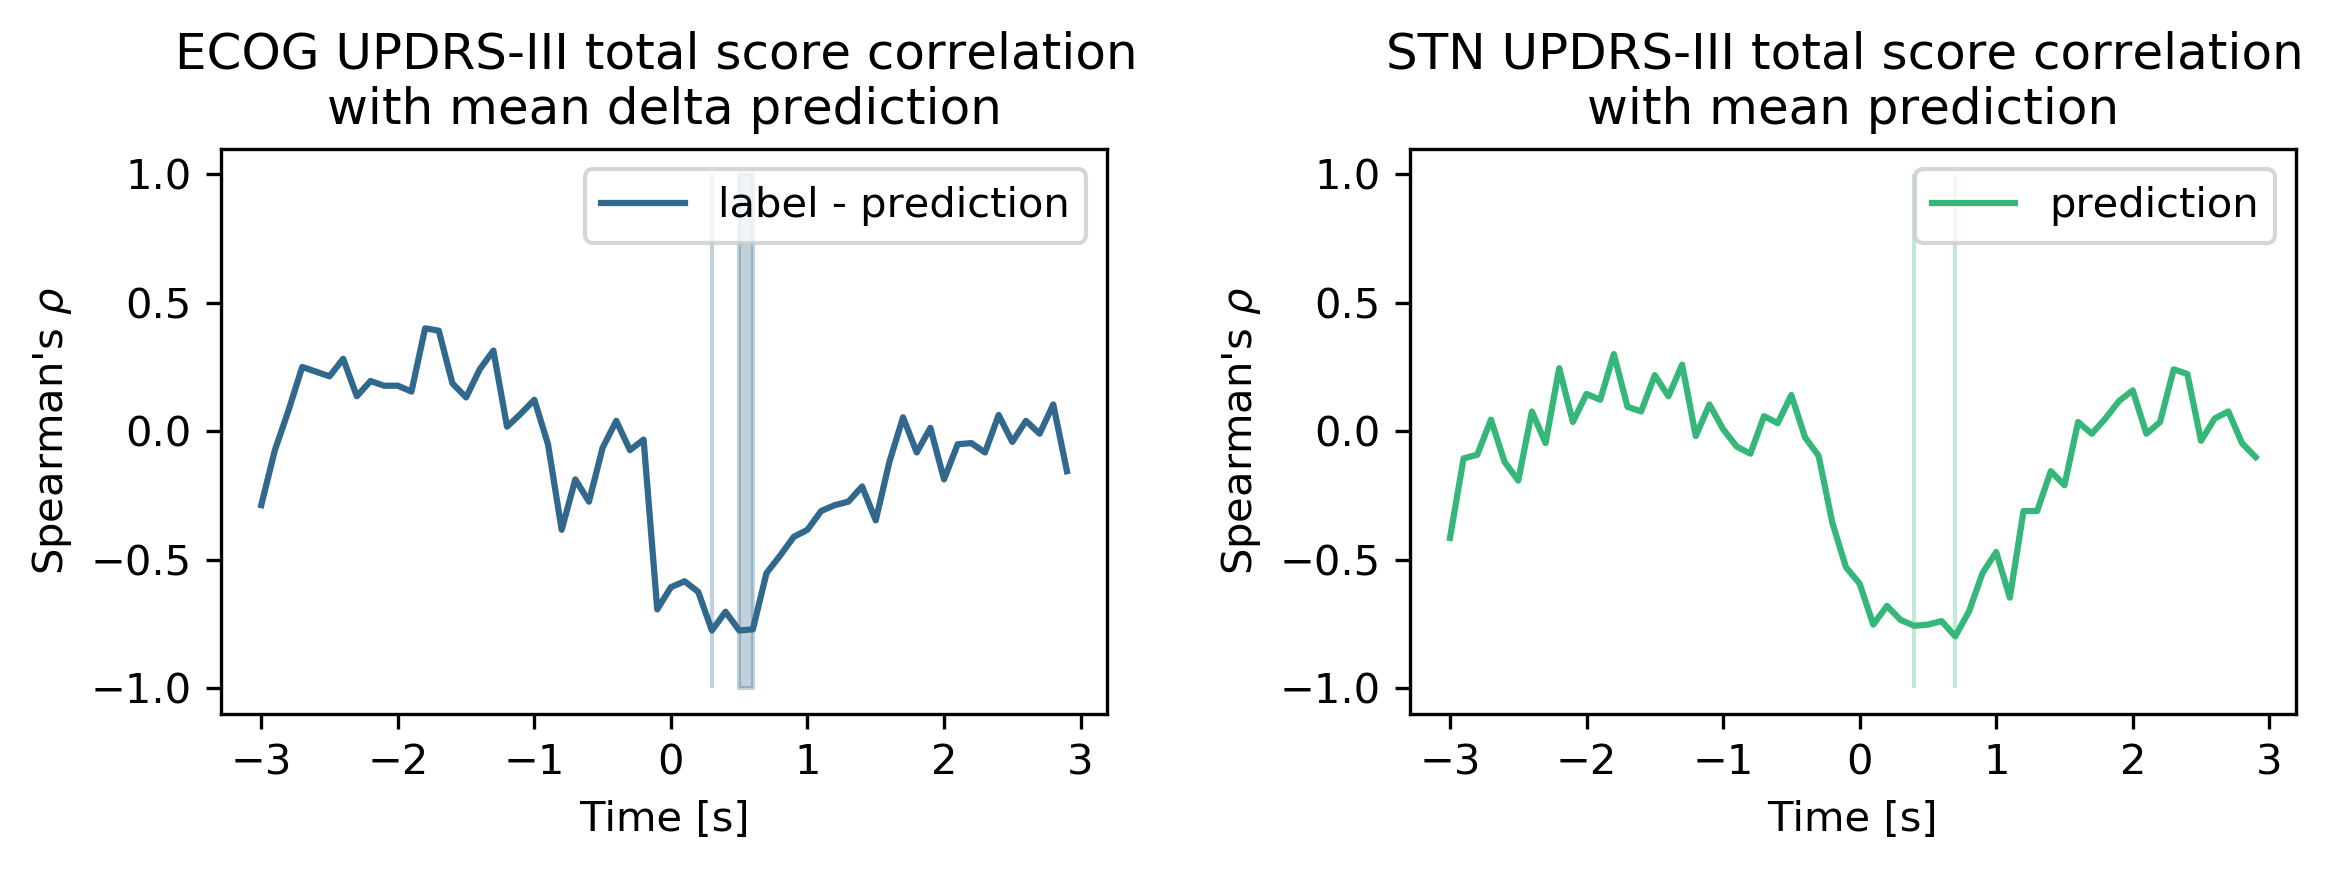

In [13]:
plt.figure(figsize=(8,3), dpi=300)
plt.subplot(121)
x_ = np.arange(-epoch_lim, epoch_lim, 1)*0.1
plt.plot(x_, sprho_arr_pred_ECOG[:,0], label="label - prediction", color=(49/255,104/255,142/255))
#plt.plot(x_, sprho_arr_pred, label = "prediction",color=(53/255,183/255,121/255))
plt.fill_between(x_, -1,1, where=sprho_arr_pred_ECOG[:,1] <0.05/11, alpha=0.3, color=(49/255,104/255,142/255))
plt.ylabel("Spearman's "+r"$\rho$")
plt.xlabel("Time [s]")
plt.legend()
plt.title("ECOG UPDRS-III total score correlation \nwith mean delta prediction")

plt.subplot(122)
x_ = np.arange(-epoch_lim, epoch_lim, 1)*0.1
#plt.plot(x_, sprho_arr_delta, label="label - prediction", color=(49/255,104/255,142/255))
plt.plot(x_, sprho_arr_pred_STN[:,0], label = "prediction",color=(53/255,183/255,121/255))
plt.fill_between(x_, -1,1, where=sprho_arr_pred_STN[:,1] <0.05/11, alpha=0.3, color=(53/255,183/255,121/255))
plt.ylabel("Spearman's "+r"$\rho$")
plt.xlabel("Time [s]")
plt.legend()
plt.title("STN UPDRS-III total score correlation \nwith mean prediction")
plt.tight_layout()

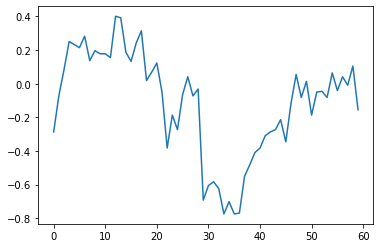

In [14]:
plt.plot(sprho_arr_pred_ECOG[:,0])